(-0.5, 1107.5, 1476.5, -0.5)

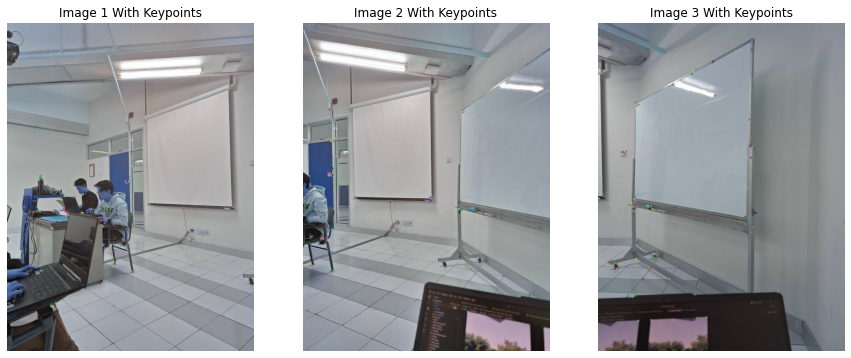

In [1]:
import cv2
import numpy as np
import matplotlib.pyplot as plt


image1 = cv2.imread('1.jpg')
image2 = cv2.imread('2.jpg')
image3 = cv2.imread('3.jpg')

image2 = cv2.resize(image2, (image1.shape[1], image1.shape[0]))
image3 = cv2.resize(image3, (image1.shape[1], image1.shape[0]))

gray1 = cv2.cvtColor(image1, cv2.COLOR_BGR2GRAY)
gray2 = cv2.cvtColor(image2, cv2.COLOR_BGR2GRAY)
gray3 = cv2.cvtColor(image3, cv2.COLOR_BGR2GRAY)

orb = cv2.ORB_create()

kp1, descriptors1 = orb.detectAndCompute(image1, None)
kp2, descriptors2 = orb.detectAndCompute(image2, None)
kp3, descriptors3 = orb.detectAndCompute(image3, None)

image1_keypoints = cv2.drawKeypoints(image1, kp1, None)
image2_keypoints = cv2.drawKeypoints(image2, kp2, None)
image3_keypoints = cv2.drawKeypoints(image3, kp3, None)

plt.figure(figsize=(15,15))

plt.subplot(1,3,1)
plt.imshow(image1_keypoints, cmap='gray')
plt.title('Image 1 With Keypoints')
plt.axis('off')

plt.subplot(1,3,2)
plt.imshow(image2_keypoints, cmap='gray')
plt.title('Image 2 With Keypoints')
plt.axis('off')

plt.subplot(1,3,3)
plt.imshow(image3_keypoints, cmap='gray')
plt.title('Image 3 With Keypoints')
plt.axis('off')

In [1]:
import numpy as np
import cv2
import glob
import imutils

# Michael Putra Handidjaja_C14210184
def adjust_brightness(image, alpha, beta):
    """
    Adjusts the brightness of the image.
    """
    adjusted_image = cv2.convertScaleAbs(image, alpha=alpha, beta=beta)
    return adjusted_image

def stitch_images(images):
    """
    Stitches a list of images into a panorama.
    """
    # Create a stitcher object
    stitcher = cv2.Stitcher_create()

    # Stitch the images
    status, stitched_image = stitcher.stitch(images)

    # Check if stitching is successful
    if status == cv2.Stitcher_OK:
        return stitched_image
    else:
        print("Image stitching failed!")
        return None

# Load image paths
image_paths = glob.glob('unstitchedImages/*.jpg')
images = []

# Define brightness parameters for each image
brightness_params = [
    (1.5, 10),  # alpha, beta for image1
    (1.5, 10),  # alpha, beta for image2
    (1.5, 10)   # alpha, beta for image3
]

# Adjust brightness for each image and add to the list
for idx, image_path in enumerate(image_paths):
    img = cv2.imread(image_path)
    
    # Get brightness parameters for this image
    alpha, beta = brightness_params[idx]
    
    # Adjust brightness
    brightened_img = adjust_brightness(img, alpha=alpha, beta=beta)
    
    images.append(brightened_img)
    cv2.imshow("Image", brightened_img)
    cv2.waitKey(0)

# Stitch the images
result = stitch_images(images)

# Display the result
if result is not None:
    # Find non-zero pixels (foreground) in the panorama
    non_zero_pixels = cv2.findNonZero(cv2.cvtColor(result, cv2.COLOR_BGR2GRAY))

    # Get bounding rectangle for the foreground
    bounding_rect = cv2.boundingRect(non_zero_pixels)

    # Crop the panorama using the bounding rectangle
    cropped_panorama = result[bounding_rect[1]:bounding_rect[1]+bounding_rect[3], 
                              bounding_rect[0]:bounding_rect[0]+bounding_rect[2]]

    cv2.imshow("Panorama", cropped_panorama)
    cv2.waitKey(0)
    cv2.destroyAllWindows()

    # Save the cropped panorama
    panorama_path = 'cropped_panorama.jpg'
    cv2.imwrite(panorama_path, cropped_panorama)
    print(f"Cropped panorama saved successfully as '{panorama_path}'")
else:
    print("Failed to stitch images. Panorama not saved.")


ModuleNotFoundError: No module named 'cv2'